In [1]:
import dask
import dask.dataframe as dd
import pandas as pd
from dask.delayed import delayed
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\user\Desktop\M5\data/calendar.csv")
print(data.head())

         date  wm_yr_wk    weekday  wday  month  year event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011          NaN   
1  2011-01-30     11101     Sunday     2      1  2011          NaN   
2  2011-01-31     11101     Monday     3      1  2011          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  


In [2]:
data.tail()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [3]:
data.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1',
       'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX',
       'snap_WI'],
      dtype='object')

In [4]:
data.shape


(1969, 13)

In [22]:
data.dtypes.value_counts()

int64     7
object    6
dtype: int64

In [6]:
data.describe()
#ne pas oublier que wm_yr_wk et wday sont des id du coup voir ce tableau n est pas tres utile
#je n ai que les colonnes numeriques peut etre faudrait penser a convertir les qualitatives en num ( 7 colonnes)

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données 
- Faire le lien entre ce dataset et les 2 autres fournis

## Checklist de base
#### Analyse de Forme :

•	date: The date in a “y-m-d” format.      
•	wm_yr_wk: The id of the week the date belongs to.        
•	weekday: The type of the day (Saturday, Sunday, …, Friday).          
•	wday: The id of the weekday, starting from Saturday.    
•	month: The month of the date.            
•	year: The year of the date.      
•	event_name_1: If the date includes an event, the name of this event.    
•	event_type_1: If the date includes an event, the type of this event.       
•	event_name_2: If the date includes a second event, the name of this event.      
•	event_type_2: If the date includes a second event, the type of this event.         
•	snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.


- **lignes et colonnes** : (1969, 13) ce qui correspond a plus de 5 années d'enregistrement
- **types de variables** : qualitatives : 6, quantitatives : 7
- **Analyse des valeurs manquantes** :
    - on a des valeurs manquantes dans les colonnes des events et de leurs id ce qui correspond tout simplement à une absence d'evenement particulier.
    
## Analyse plus détaillée

- **Wday
- vente constante entre les jours de la semaine
- **Month
- le mois de decembre et celui de janvier enregistrent le plus de vente ----> fetes de fin d'année
- **year
- il n'existe pas de changement dans le comportement du consommateur au fil de ces cinq années :  la premiere année démarre la fin du mois de janvier donc ce qui explique que le histo est un peu plus bas et la derniere année juqu' au mois de juin du coup c'est pareil(inférieur de moitié ) 
- **Snap CA, snap TX et snap WI 
- comportement constant on a un evenement "positif" ( 1 ) qui fait presque la moitié d'un evenement "negatif" (0)

## remarque
on a calculé le nombre de 'wm_yr_wk' qui est de 282 pour établir un lien avec le dataset "sell_prices"

In [7]:
data.isnull().any()

date            False
wm_yr_wk        False
weekday         False
wday            False
month           False
year            False
event_name_1     True
event_type_1     True
event_name_2     True
event_type_2     True
snap_CA         False
snap_TX         False
snap_WI         False
dtype: bool

In [8]:
(data['event_name_1']).value_counts()

SuperBowl              6
Pesach End             6
Ramadan starts         6
ValentinesDay          6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
Mother's day           6
Purim End              6
StPatricksDay          6
LentWeek2              6
LentStart              6
PresidentsDay          6
MartinLutherKingDay    5
OrthodoxChristmas      5
EidAlAdha              5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
IndependenceDay        5
Halloween              5
ColumbusDay            5
LaborDay               5
Eid al-Fitr            5
Cinco De Mayo          5
OrthodoxEaster         5
Easter                 5
Father's day           4
Name: event_name_1, dtype: int64

on commence à regarder de plus près quelques variables pour estimer leurs importance

array([[<AxesSubplot:title={'center':'wday'}>]], dtype=object)

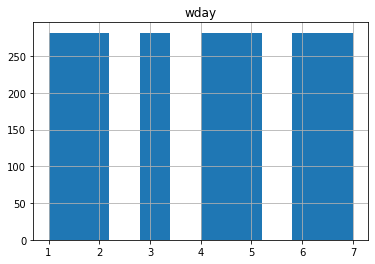

In [9]:
data.hist(column='wday')
#wday: The id of the weekday, starting from Saturday.

<AxesSubplot:ylabel='Density'>

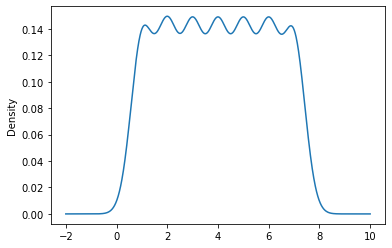

In [10]:
# density plot
# kernel density estimation
data['wday'].plot.kde()

<AxesSubplot:ylabel='wday'>

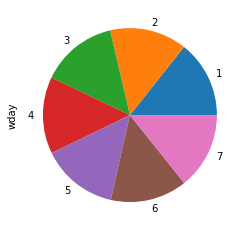

In [11]:
# diagramme à secteurs 
data['wday'].value_counts().plot.pie()

On peut deja remarquer que les achats sont à priori repartis equitablement entre les jours de semaine.  
On peut commencer à regarder les mois de plus près maintenant !

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

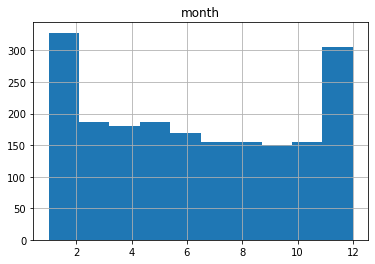

In [12]:
data.hist(column='month')

<AxesSubplot:ylabel='Density'>

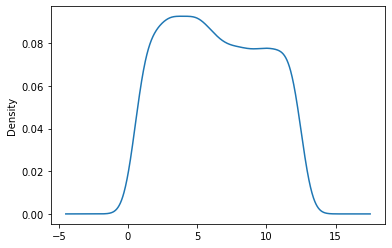

In [13]:
data['month'].plot.kde()

<AxesSubplot:ylabel='month'>

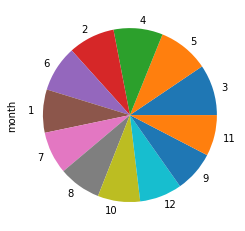

In [14]:
data['month'].value_counts().plot.pie()

A priori les achats sont plus accentués en fetes de fin d année et en debut d'année.  
Maintenant je vais m'intéresser aux années pour voir si y'a un changement dans le comportement du consommateur au fil de ces cinq années

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

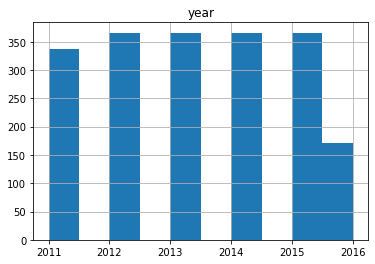

In [15]:
data.hist(column='year')

The historical data range from 2011-01-29 to 2016-06-19.  
Et du coup ça explique la raison pour laquelle 2016 et 2011 sont visiblement bas comparées aux autres

<AxesSubplot:ylabel='Density'>

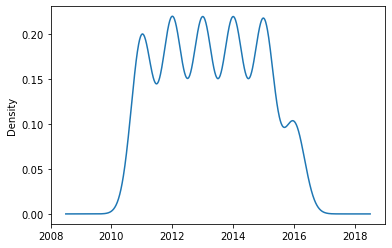

In [16]:
data['year'].plot.kde()

même constat!  mais on peut penser que la consommation reste stable durant ces 5 années

Voyons voir les colonnes snap dans chaque état 

array([[<AxesSubplot:title={'center':'snap_CA'}>]], dtype=object)

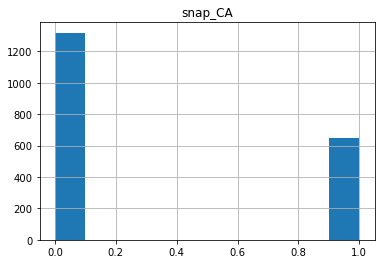

In [17]:
data.hist(column='snap_CA')

array([[<AxesSubplot:title={'center':'snap_TX'}>]], dtype=object)

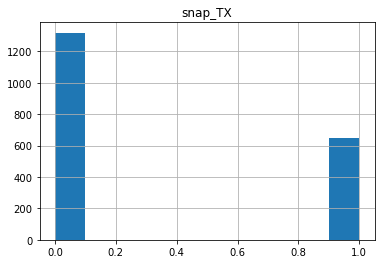

In [18]:
data.hist(column='snap_TX')

array([[<AxesSubplot:title={'center':'snap_WI'}>]], dtype=object)

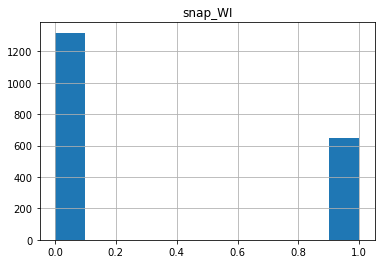

In [19]:
data.hist(column='snap_WI')

On constate que les snap ou y a eu un évenement marquant sont 50% inférieur à ceux ou ya rien eu ! ça tient la route !

In [20]:
data['wm_yr_wk'].nunique()

282

In [21]:
dataframe = pd.melt(data, id_vars=['wm_yr_wk'])

print(dataframe)

       wm_yr_wk variable       value
0         11101     date  2011-01-29
1         11101     date  2011-01-30
2         11101     date  2011-01-31
3         11101     date  2011-02-01
4         11101     date  2011-02-02
...         ...      ...         ...
23623     11620  snap_WI           1
23624     11620  snap_WI           0
23625     11620  snap_WI           0
23626     11621  snap_WI           0
23627     11621  snap_WI           0

[23628 rows x 3 columns]
